In [1]:
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
print(device)
torch.set_default_device(device)

x = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    ], requires_grad=True)

y = x**2 + 4*x + 5

x2 = torch.tensor([
    [11.0, 12.0, 13.0],
    [14.0, 15.0, 16.0],
    ], device=device)

y2 = x2**2 + 4*x2 + 5

print(f'{x=}')
print(f'{y=}')
print(f'{x2=}')
print(f'{y2=}')

print(x.grad)
print(x2.grad)

mps
x=tensor([[1., 2., 3.],
        [4., 5., 6.]], device='mps:0', requires_grad=True)
y=tensor([[10., 17., 26.],
        [37., 50., 65.]], device='mps:0', grad_fn=<AddBackward0>)
x2=tensor([[11., 12., 13.],
        [14., 15., 16.]], device='mps:0')
y2=tensor([[170.0000, 197.0000, 226.0000],
        [257.0000, 290.0000, 325.0000]], device='mps:0')
None
None


In [2]:
output = (x * x2)
print(output)
print(output.grad_fn)
output.mean().backward()
print(x.grad)
print(x2.grad)

tensor([[11., 24., 39.],
        [56., 75., 96.]], device='mps:0', grad_fn=<MulBackward0>)
tensor([[1.8333, 2.0000, 2.1667],
        [2.3333, 2.5000, 2.6667]], device='mps:0')
None


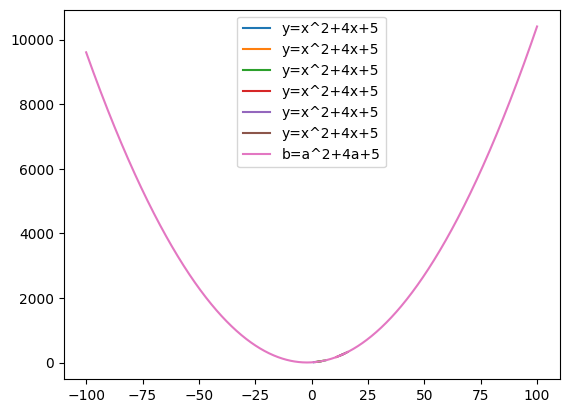

In [3]:
import matplotlib.pyplot as plt

a = np.linspace(-100, 100, 1000)
b = a**2 + 4*a + 5

plt.plot(x.numpy(force=True), y.numpy(force=True), label='y=x^2+4x+5')
plt.plot(x2.numpy(force=True), y2.numpy(force=True), label='y=x^2+4x+5')
plt.plot(a, b, label='b=a^2+4a+5')
plt.legend()
plt.show()

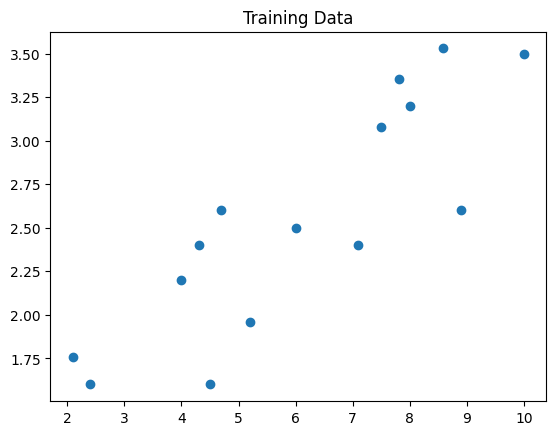

In [4]:
x_train_np = np.array([
    [4.7],   [2.4], [7.5], [7.1],  [4.3],
    [7.816], [8.9], [5.2], [8.59], [2.1],
    [8],     [10],  [4.5], [6],    [4],
], dtype=np.float32)
y_train_np = np.array([
    [2.6],   [1.6], [3.08], [2.4],  [2.4],
    [3.357], [2.6], [1.96], [3.53], [1.76],
    [3.2],   [3.5], [1.6],  [2.5],  [2.2],
], dtype=np.float32)
# plt.figure(figsize=(12, 8))
# plt.scatter(x_train, y_train, s=250, c='g') #, label='training data')
# plt.legend()
plt.plot(x_train_np, y_train_np, 'o', label='training data')
plt.title('Training Data')
plt.show()

In [5]:
x_train = torch.from_numpy(x_train_np).to(device=device)
y_train = torch.from_numpy(y_train_np).to(device=device)

# x_train.requires_grad_()
# y_train.requires_grad_()

# print(f'{x_train=}')
# print(f'{y_train=}')

In [6]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 1e-4

w1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.randn(hidden_size, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.randn(output_size, requires_grad=True)
print(f'{w1=}')
print(f'{b1=}')
print(f'{w2=}')
print(f'{b2=}')


w1=tensor([[-0.0822]], device='mps:0', requires_grad=True)
b1=tensor([0.6869], device='mps:0', requires_grad=True)
w2=tensor([[-1.0990]], device='mps:0', requires_grad=True)
b2=tensor([-2.5728], device='mps:0', requires_grad=True)


In [7]:
for i in range(100):
    y_pred = x_train.mm(w1) + b1
    # y_pred = torch.relu(y_pred)
    y_pred = y_pred.mm(w2) + b2
    loss = ((y_pred - y_train) ** 2).sum()
    if i % 50 == 0:
        print(f'{loss.item()=}')
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

print(f'{w1=}')
print(f'{b1=}')
print(f'{w2=}')
print(f'{b2=}')


loss.item()=429.68939208984375
loss.item()=34.55318069458008
w1=tensor([[-0.6921]], device='mps:0', requires_grad=True)
b1=tensor([0.4104], device='mps:0', requires_grad=True)
w2=tensor([[-1.1565]], device='mps:0', requires_grad=True)
b2=tensor([-2.3358], device='mps:0', requires_grad=True)


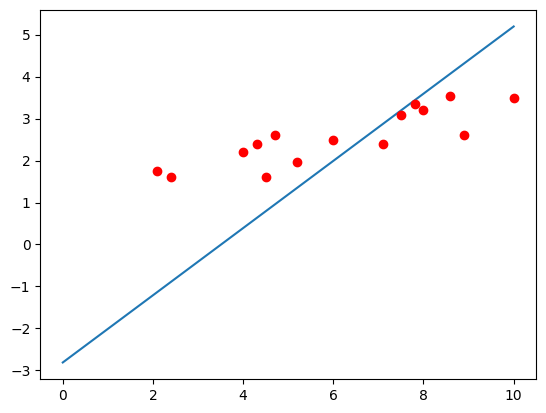

In [8]:
x_ = np.linspace(0, 10, 100)
with torch.no_grad():
    y_pred = w1.numpy(force=True) * (x_) + b1.numpy(force=True)
    y_pred = w2.numpy(force=True) * (y_pred) + b2.numpy(force=True)
    plt.plot(x_, y_pred.squeeze())
    plt.plot(x_train.numpy(force=True), y_train.numpy(force=True), 'ro')
    plt.show()

In [9]:
import torch.nn as nn
import torch.optim as optim

input_size = 1
hidden_size = 100
output_size = 1

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    # nn.ReLU(),
    nn.Linear(hidden_size, output_size),
)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

Epoch [10/100], Loss: 1.3188
Epoch [20/100], Loss: 0.4195
Epoch [30/100], Loss: 0.1476
Epoch [40/100], Loss: 0.1174
Epoch [50/100], Loss: 0.1312
Epoch [60/100], Loss: 0.1108
Epoch [70/100], Loss: 0.1127
Epoch [80/100], Loss: 0.1116
Epoch [90/100], Loss: 0.1108
Epoch [100/100], Loss: 0.1107
OrderedDict([('0.weight', tensor([[ 0.6011],
        [-0.3521],
        [-0.8005],
        [-0.8273],
        [ 0.6827],
        [ 0.9486],
        [ 0.7384],
        [-0.8681],
        [ 0.1704],
        [ 0.3461],
        [-0.7734],
        [-0.4713],
        [-0.8564],
        [ 0.3735],
        [ 0.1468],
        [-0.2486],
        [ 0.6575],
        [-0.1322],
        [ 0.1242],
        [-0.1119],
        [-0.2845],
        [ 0.4478],
        [-0.1176],
        [ 0.2633],
        [-0.2752],
        [-0.8755],
        [-0.9636],
        [ 0.2286],
        [ 0.9039],
        [ 0.1349],
        [-0.7652],
        [-0.5152],
        [-0.0958],
        [ 0.0663],
        [ 0.1380],
        [ 0.3049],

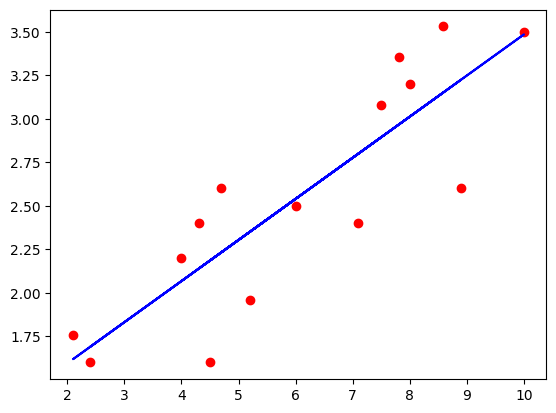

tensor([[2.2329],
        [1.6898],
        [2.8940],
        [2.7996],
        [2.1384],
        [2.9686],
        [3.2246],
        [2.3509],
        [3.1514],
        [1.6189],
        [3.0121],
        [3.4844],
        [2.1856],
        [2.5398],
        [2.0676]], device='mps:0', grad_fn=<LinearBackward0>)

In [10]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{100}], Loss: {loss.item():.4f}')
print(model.state_dict())
plt.plot(x_train.numpy(force=True), y_train.numpy(force=True), 'ro')
plt.plot(x_train.numpy(force=True), y_pred.detach().numpy(force=True), 'b-')
plt.show()
y_pred

In [11]:
W = torch.randn(6)
x = torch.tensor([10]*6, dtype=torch.float32)
b = torch.tensor(3)
W

tensor([-1.8930,  1.0985, -0.3903,  0.1523,  1.2240,  0.3855], device='mps:0')

In [12]:
y= W*x + b
print(y)

tensor([-15.9301,  13.9850,  -0.9027,   4.5226,  15.2400,   6.8549],
       device='mps:0')


/Users/graham/tools/hiddenlayer/hiddenlayer/__init__.py


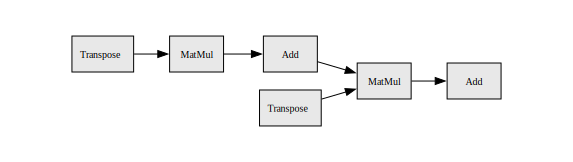

In [19]:
import hiddenlayer as hl
print(hl.__file__)
hl.build_graph(model, x_train[1]) # torch.zeros([100,1]))

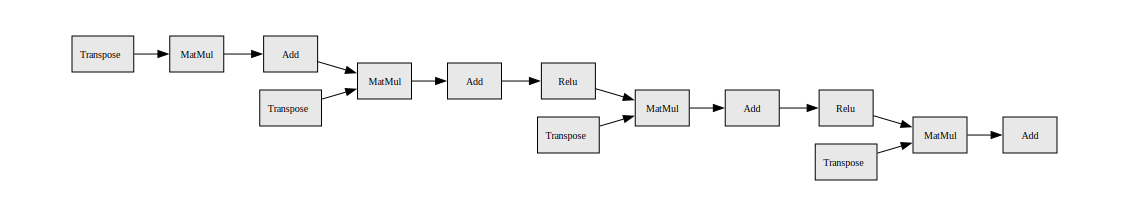

In [21]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, output_size),
)
hl.build_graph(model2, x_train[1])